<a href="https://colab.research.google.com/github/hjfuentes/Laboratorio-Datos-Sociales/blob/main/Talleres/taller_pruebas_estadisticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller: Pruebas estadisticas

Autor: Sergio Diaz Paredes

Contacto: [Linkedin](https://www.linkedin.com/in/sergio-diaz-paredes/)

Pizarra: [miro](https://miro.com/app/board/uXjVGPxpXCk=/?share_link_id=330583708877)

Este taller utiliza una base de datos de un **programa de intervención en una población** (por ejemplo, estudiantes o participantes de un proyecto institucional) para practicar inferencia estadística en escenarios reales. A lo largo del documento se revisan conceptos clave como el **Teorema del Límite Central**, la diferencia entre **distribuciones z y t**, y la aplicación de **pruebas de hipótesis** para comparar medias en distintos diseños: una muestra, mediciones **antes vs. después**, grupos **independientes** y **múltiples grupos** (ANOVA). Además, se incluyen pruebas de supuestos como **normalidad** y **homogeneidad de varianzas**, con el objetivo de interpretar resultados de forma correcta y sustentable.


## Paquetes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

## Data

In [ ]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTpHz0V8CVDvgw39-Yg535NzrLXMVfxB5riN0G6L8c4LGQfliXezEzlThrsj8aIWyi3gzXBmCq6KjPc/pub?gid=264294795&single=true&output=csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   peso    50 non-null     float64
 1   edad    50 non-null     float64
 2   t1      50 non-null     int64  
 3   t2      50 non-null     int64  
 4   hem     50 non-null     float64
 5   trig    50 non-null     float64
 6   psico1  50 non-null     float64
 7   psico2  50 non-null     float64
 8   hig1    50 non-null     float64
 9   hig2    50 non-null     float64
 10  vitc    50 non-null     float64
 11  vitb    50 non-null     float64
dtypes: float64(10), int64(2)
memory usage: 4.8 KB


# Teorema del limite central

In [ ]:
a = 0  # límite inferior
b = 1  # límite superior

mu = 0  # media
sigma = 1  # desviación estándar

n = 1000
n_remes = 1000

In [ ]:
def remuestreo_distribucion(distribucion, n, n_remes):
    medias = []
    for _ in range(n_remes):
        muestra = np.random.choice(distribucion, n, replace=True)
        media = np.mean(muestra)
        medias.append(media)
    return medias

In [ ]:
uniforme = np.random.uniform(a, b, n)
normal = np.random.normal(mu, sigma, n)

medias_uniforme = remuestreo_distribucion(uniforme, n, n_remes)
medias_normal = remuestreo_distribucion(normal, n, n_remes)

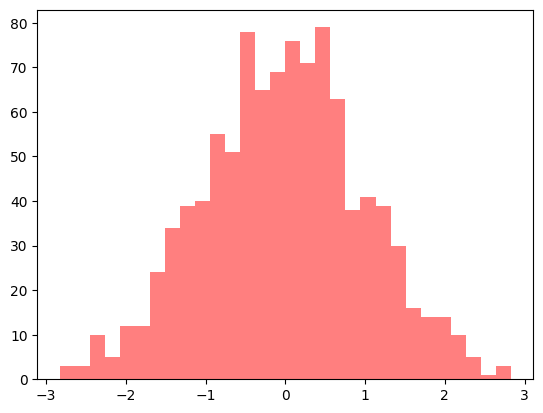

In [ ]:
plt.hist(normal, bins=30, alpha=0.5, label='Normal', color='red')
plt.show()

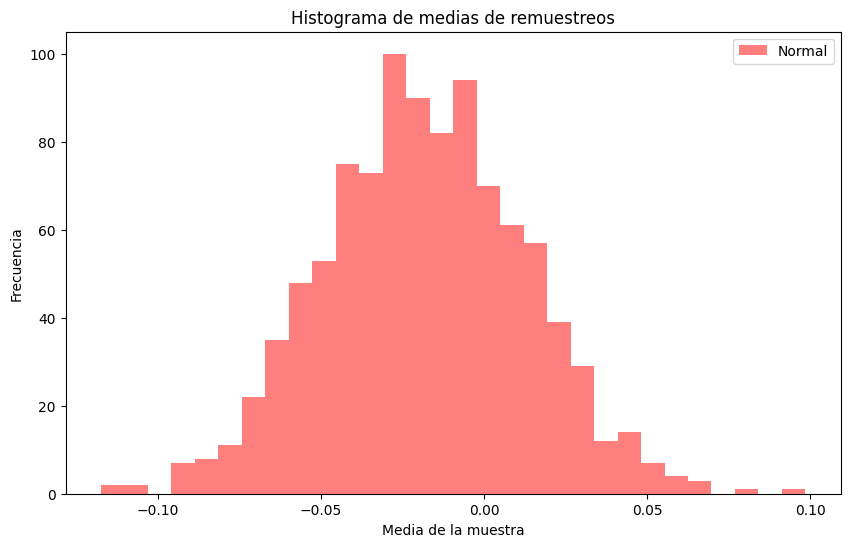

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(medias_normal, bins=30, alpha=0.5, label='Normal', color='red')
plt.xlabel('Media de la muestra')
plt.ylabel('Frecuencia')
plt.title('Histograma de medias de remuestreos')
plt.legend()
plt.show()

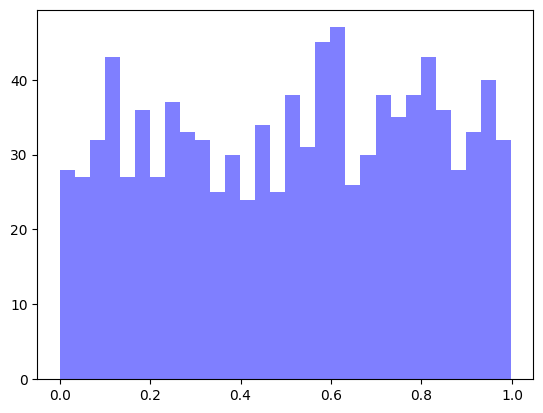

In [ ]:
plt.hist(uniforme, bins=30, alpha=0.5, label='Uniforme', color='blue')
plt.show()

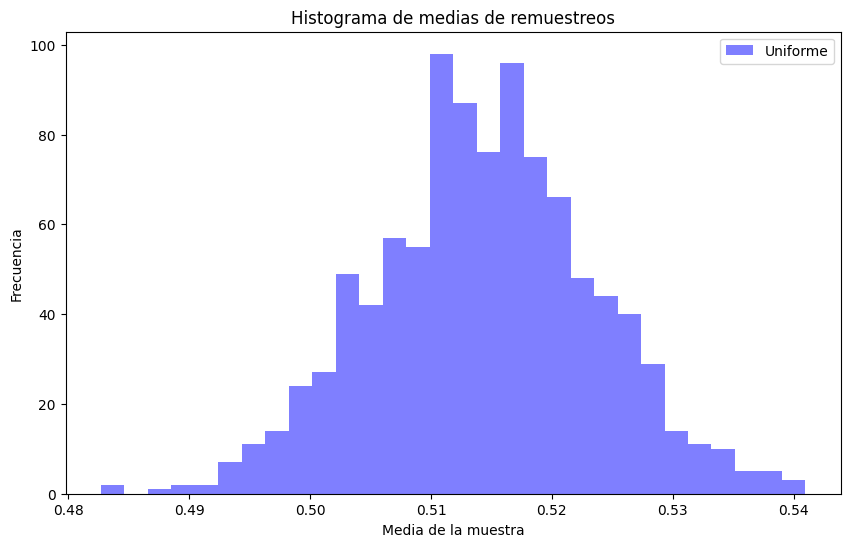

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(medias_uniforme, bins=30, alpha=0.5, label='Uniforme', color='blue')
plt.xlabel('Media de la muestra')
plt.ylabel('Frecuencia')
plt.title('Histograma de medias de remuestreos')
plt.legend()
plt.show()

# Distribucion t y z

In [ ]:
from scipy.stats import t, norm

mu = 0  # media
sigma = 1  # desviación estándar
df_values = [1, 5, 10, 20, 50]  # Grados de libertad

x = np.linspace(-4, 4, 1000)  # Valores de x para la gráfica

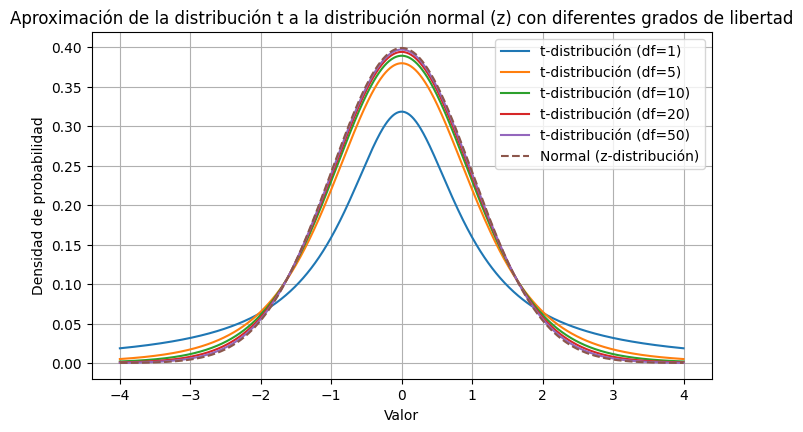

In [ ]:
plt.figure(figsize=(8, 4.5))
for df_ in df_values:
    t_pdf = t.pdf(x, df_, loc=mu, scale=sigma)  # Densidad de probabilidad de la distribución t
    plt.plot(x, t_pdf, label=f't-distribución (df={df_})')

z_pdf = norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, z_pdf, label='Normal (z-distribución)', linestyle='--')

# Configuración del gráfico
plt.title('Aproximación de la distribución t a la distribución normal (z) con diferentes grados de libertad')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()

# Prueba de hipotesis de la media

En un centro educativo el peso promedio de un grupo de estudiantes fue 52 kilos, luego de aplicar un programa de alimentacion se busca identificar si hubo cambios en el peso de los estudiantes, para ello se recolecto una muestra.

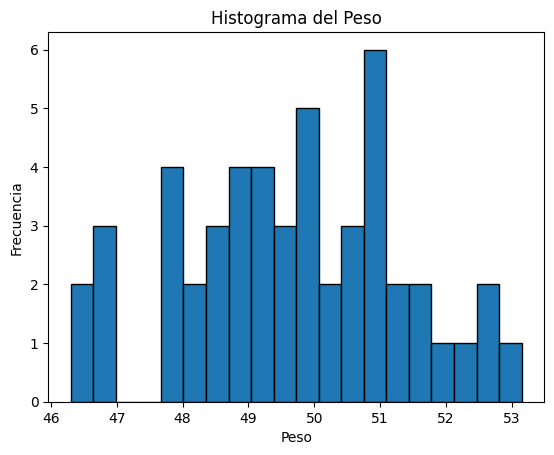

In [ ]:
df['peso'].plot.hist(bins=20, edgecolor='black')
plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.title('Histograma del Peso')
plt.show()

In [ ]:
df['peso'].mean()

np.float64(49.6492)

In [ ]:
media_muestral = df['peso'].mean()
desviacion_estandar_muestral = df['peso'].std()

In [ ]:
media_poblacional = 52

# Realizar la prueba de hipótesis con una media poblacional conocida
t_stat, p_value = stats.ttest_1samp(df['peso'], media_poblacional)

In [ ]:
stats.ttest_1samp(df['peso'],52)

TtestResult(statistic=np.float64(-9.993330491005619), pvalue=np.float64(2.0582381046748464e-13), df=np.int64(49))

In [ ]:
# Imprimir resultados de la prueba de hipótesis
print("Prueba de hipótesis con la media poblacional = 52:")
print(f"Media muestral: {media_muestral}")
print(f"Desviación estándar muestral: {desviacion_estandar_muestral}")
print(f"T-Estadística: {t_stat}")
print(f"Valor p: {p_value}")

Prueba de hipótesis con la media poblacional = 52:
Media muestral: 49.6492
Desviación estándar muestral: 1.6633760113402027
T-Estadística: -9.993330491005619
Valor p: 2.0582381046748464e-13


In [ ]:
# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("El valor p es menor que el nivel de significancia (alpha), por lo tanto, rechazamos la hipótesis nula.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")

El valor p es menor que el nivel de significancia (alpha), por lo tanto, rechazamos la hipótesis nula.


# Prueba de hipotesis para la diferencia de la media(pareadas)

Se aplica un programa de gestion emocional en un grupo de estudiantes, contando con ambos datos se busca identificar si hubo un cambio positivo.

<Axes: ylabel='Density'>

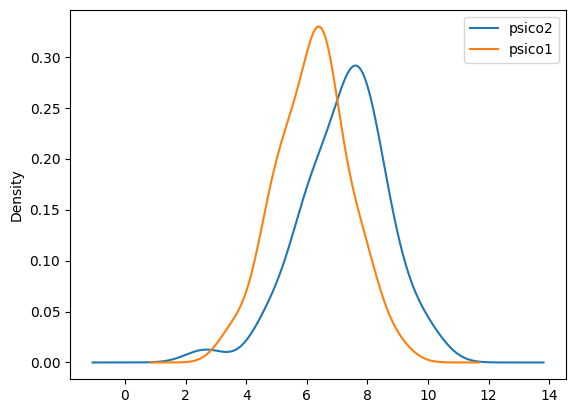

In [ ]:
df[['psico2','psico1']].plot.kde()

In [ ]:
# Realizar la prueba t apareada con hipótesis alternativa "greater" (mayor que)
t_stat, p_value = stats.ttest_rel(df['psico2'], df['psico1'], alternative='greater')

# Imprimir resultados
print("Prueba t apareada con hipótesis alternativa de psico2 > psico1:")
print(f"T-Estadística: {t_stat}")
print(f"Valor p: {p_value}")

Prueba t apareada con hipótesis alternativa de psico2 > psico1:
T-Estadística: 6.2694866111829315
Valor p: 4.490478959177365e-08


In [ ]:
df['psicodif'] = df['psico2'] - df['psico1']

In [ ]:
stats.ttest_1samp(df['psicodif'],0, alternative='greater')

TtestResult(statistic=np.float64(6.2694866111829315), pvalue=np.float64(4.490478959177365e-08), df=np.int64(49))

# Prueba de hipotesis para la diferencia de la media(independientes)

Buscando mejorar los niveles de vitamina B, para ello se aplico un tratamiento a un grupo dejando al resto como control.

<Axes: xlabel='vitb', ylabel='Density'>

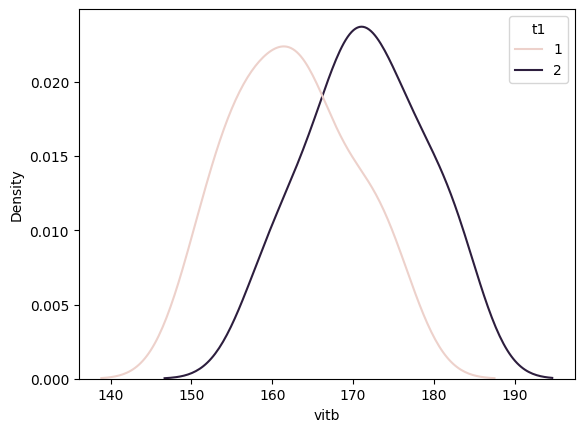

In [ ]:
sns.kdeplot(df,x='vitb',hue='t1')

## Prueba t de diferencia de medias

In [ ]:
group1 = df[df['t1'] == 1]['vitb']
group2 = df[df['t1'] == 2]['vitb']

# Realizar la prueba t de dos muestras
t_stat, p_value = stats.ttest_ind(group2, group1, equal_var=True, alternative='greater')

# Imprimir resultados
print("Prueba t de dos muestras para diferencia de medias:")
print(f"T-Estadística: {t_stat}")
print(f"Valor p: {p_value}")

Prueba t de dos muestras para diferencia de medias:
T-Estadística: 4.352662701737441
Valor p: 3.505644013086665e-05


In [ ]:
group2.mean()

np.float64(171.43599999999998)

In [ ]:
group1.mean()

np.float64(162.4204)

In [ ]:
group2.mean() - group1.mean()

np.float64(9.015599999999978)

## Prueba ANOVA para multiples medias

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
# Crear el modelo ANOVA
modelo_anova = ols('vitb ~ C(t1)', data=df).fit()

# Realizar el ANOVA
anova_resultados = sm.stats.anova_lm(modelo_anova, typ=2)

# Imprimir los resultados del ANOVA
print("Resultados del ANOVA:")
print(anova_resultados)

# Imprimir el resumen del modelo ANOVA
print("\nResumen del modelo ANOVA:")
print(modelo_anova.summary())

Resultados del ANOVA:
               sum_sq    df          F   PR(>F)
C(t1)     1016.013042   1.0  18.945673  0.00007
Residual  2574.130096  48.0        NaN      NaN

Resumen del modelo ANOVA:
                            OLS Regression Results                            
Dep. Variable:                   vitb   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     18.95
Date:                Thu, 15 Jan 2026   Prob (F-statistic):           7.01e-05
Time:                        23:09:44   Log-Likelihood:                -169.48
No. Observations:                  50   AIC:                             343.0
Df Residuals:                      48   BIC:                             346.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 

## Pruebas de igualdad de varianzas

In [ ]:
# Realizar la prueba de Levene para igualdad de varianzas
statistic, p_value = stats.levene(group1, group2)

# Imprimir resultados
print("Prueba de Levene para igualdad de varianzas:")
print(f"Estadística de prueba: {statistic}")
print(f"Valor p: {p_value}")

# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("El valor p es menor que el nivel de significancia (alpha), por lo tanto, rechazamos la hipótesis nula.")
    print("No hay igualdad de varianzas entre los dos grupos.")
else:
    print("El valor p es mayor que el nivel de significancia (alpha), por lo tanto, no rechazamos la hipótesis nula.")
    print("Hay igualdad de varianzas entre los dos grupos.")

Prueba de Levene para igualdad de varianzas:
Estadística de prueba: 0.039045946269960975
Valor p: 0.8441920956351256
El valor p es mayor que el nivel de significancia (alpha), por lo tanto, no rechazamos la hipótesis nula.
Hay igualdad de varianzas entre los dos grupos.
